In [1]:
import pandas as pd
import numpy as np

In [2]:
# https://data.ny.gov/Transportation/Turnstile-Usage-Data-2016/ekwu-khcy
# https://data.ny.gov/api/views/ekwu-khcy/rows.csv?accessType=DOWNLOAD
data = pd.read_csv('Turnstile_Usage_Data__2016.csv')
data.shape

/Users/brianmcmahon/anaconda3/envs/tensorflow1.4/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(9492670, 11)

In [3]:
df = pd.DataFrame(data)
df.shape

(9492670, 11)

In [4]:
df.columns

Index(['C/A', 'Unit', 'SCP', 'Station', 'Line Name', 'Division', 'Date',
       'Time', 'Description', 'Entries',
       'Exits                                                     '],
      dtype='object')

In [5]:
df=df.rename(columns = {'Exits                                                     ':'Exits'})

In [6]:
df.columns

Index(['C/A', 'Unit', 'SCP', 'Station', 'Line Name', 'Division', 'Date',
       'Time', 'Description', 'Entries', 'Exits'],
      dtype='object')

In [7]:
df.head()

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits
0,A002,R051,02-00-00,59 ST,NQR456,BMT,03/04/2016,23:00:00,REGULAR,5572864,1881239
1,A002,R051,02-00-00,59 ST,NQR456,BMT,03/04/2016,19:00:00,REGULAR,5572521,1881206
2,A002,R051,02-00-00,59 ST,NQR456,BMT,03/04/2016,15:00:00,REGULAR,5571587,1881113
3,A002,R051,02-00-00,59 ST,NQR456,BMT,03/04/2016,11:00:00,REGULAR,5571313,1881031
4,A002,R051,02-00-00,59 ST,NQR456,BMT,03/04/2016,08:10:05,REGULAR,5571173,1880736


In [8]:
df.describe()

,Entries,Exits
count,9.492670e+06,9.492670e+06
mean,3.542553e+07,2.850508e+07
std,1.953005e+08,1.754109e+08
min,0.000000e+00,0.000000e+00
25%,5.723050e+05,2.936032e+05
50%,2.595306e+06,1.507240e+06
75%,6.546587e+06,4.656424e+06
max,2.147480e+09,2.097170e+09


In [9]:
q4 = df.iloc[9000000:,3:]
print(q4.shape)
print(type(q4))

(492670, 8)
<class 'pandas.core.frame.DataFrame'>


In [10]:
q4['Entry_Inc'] = abs(q4.Entries.diff())
q4['Exits_Inc'] = abs(q4.Exits.diff())
q4.head()

,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Entry_Inc,Exits_Inc
9000000,75 AV,EF,IND,12/03/2016,03:00:00,REGULAR,714833,200563,NaN,NaN
9000001,75 AV,EF,IND,12/03/2016,07:00:00,REGULAR,714833,200565,0.0,2.0
9000002,75 AV,EF,IND,12/03/2016,11:00:00,REGULAR,714845,200566,12.0,1.0
9000003,75 AV,EF,IND,12/03/2016,15:00:00,REGULAR,714858,200570,13.0,4.0
9000004,75 AV,EF,IND,12/03/2016,19:00:00,REGULAR,714879,200579,21.0,9.0


In [11]:
# aggregate by station then by day
# add columns for incremental change by day
# remove outliers
# per station, two sep analyses: group by time, and group by date, weekday/weekend


q4.head()

,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Entry_Inc,Exits_Inc
9000000,75 AV,EF,IND,12/03/2016,03:00:00,REGULAR,714833,200563,NaN,NaN
9000001,75 AV,EF,IND,12/03/2016,07:00:00,REGULAR,714833,200565,0.0,2.0
9000002,75 AV,EF,IND,12/03/2016,11:00:00,REGULAR,714845,200566,12.0,1.0
9000003,75 AV,EF,IND,12/03/2016,15:00:00,REGULAR,714858,200570,13.0,4.0
9000004,75 AV,EF,IND,12/03/2016,19:00:00,REGULAR,714879,200579,21.0,9.0


In [12]:
q4_stndatetime = q4.groupby([ "Station", "Date",'Time']).sum()
q4_stndatetime.head()

Entries       Exits     Entry_Inc  \
Station Date       Time                                             
1 AV    12/17/2016 03:00:00  1414570279  1467667617  2.643768e+09   
                   07:00:00  1414570809  1467668254  5.300000e+02   
                   11:00:00  1414572780  1467670839  1.971000e+03   
                   15:00:00  1414576771  1467674733  3.991000e+03   
                   19:00:00  1414581693  1467680117  4.922000e+03   

                                Exits_Inc  
Station Date       Time                    
1 AV    12/17/2016 03:00:00  2.760436e+09  
                   07:00:00  6.370000e+02  
                   11:00:00  2.585000e+03  
                   15:00:00  3.894000e+03  
                   19:00:00  5.384000e+03

In [13]:
q4_stn = q4.groupby([ "Station"]).sum()
q4_stn.head()

,Entries,Exits,Entry_Inc,Exits_Inc
Station,,,,
1 AV,118834029691,123295093418,5.287802e+09,5.521180e+09
103 ST,18872875702,73397661235,3.531335e+08,3.167460e+09
103 ST-CORONA,8558848937,8054363526,1.950536e+08,1.967069e+08
104 ST,418434594248,426205991966,1.146288e+10,1.188450e+10
110 ST,3735570296,3764865417,5.675520e+07,1.105878e+08


In [14]:
q4_stn = pd.DataFrame(q4_stn)
q4_stn.head()

,Entries,Exits,Entry_Inc,Exits_Inc
Station,,,,
1 AV,118834029691,123295093418,5.287802e+09,5.521180e+09
103 ST,18872875702,73397661235,3.531335e+08,3.167460e+09
103 ST-CORONA,8558848937,8054363526,1.950536e+08,1.967069e+08
104 ST,418434594248,426205991966,1.146288e+10,1.188450e+10
110 ST,3735570296,3764865417,5.675520e+07,1.105878e+08


In [15]:
q4_stn['Station_ID'] = q4_stn.index
q4_stn.head()

,Entries,Exits,Entry_Inc,Exits_Inc,Station_ID
Station,,,,,
1 AV,118834029691,123295093418,5.287802e+09,5.521180e+09,1 AV
103 ST,18872875702,73397661235,3.531335e+08,3.167460e+09,103 ST
103 ST-CORONA,8558848937,8054363526,1.950536e+08,1.967069e+08,103 ST-CORONA
104 ST,418434594248,426205991966,1.146288e+10,1.188450e+10,104 ST
110 ST,3735570296,3764865417,5.675520e+07,1.105878e+08,110 ST


In [16]:
q4_stn['Idx'] = np.arange(q4_stn.shape[0])
q4_stn.head()

,Entries,Exits,Entry_Inc,Exits_Inc,Station_ID,Idx
Station,,,,,,
1 AV,118834029691,123295093418,5.287802e+09,5.521180e+09,1 AV,0
103 ST,18872875702,73397661235,3.531335e+08,3.167460e+09,103 ST,1
103 ST-CORONA,8558848937,8054363526,1.950536e+08,1.967069e+08,103 ST-CORONA,2
104 ST,418434594248,426205991966,1.146288e+10,1.188450e+10,104 ST,3
110 ST,3735570296,3764865417,5.675520e+07,1.105878e+08,110 ST,4


In [17]:
q4_stn = q4_stn.set_index('Idx')
q4_stn.head()

,Entries,Exits,Entry_Inc,Exits_Inc,Station_ID
Idx,,,,,
0,118834029691,123295093418,5.287802e+09,5.521180e+09,1 AV
1,18872875702,73397661235,3.531335e+08,3.167460e+09,103 ST
2,8558848937,8054363526,1.950536e+08,1.967069e+08,103 ST-CORONA
3,418434594248,426205991966,1.146288e+10,1.188450e+10,104 ST
4,3735570296,3764865417,5.675520e+07,1.105878e+08,110 ST


In [20]:
# demographic data: NYC census
# map of startups in NYC
# calendar of tech events
# unicorn 

import seaborn as sns
sns.set_style("whitegrid")


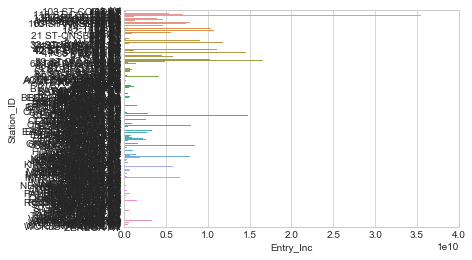

In [21]:
ax = sns.barplot(x="Entry_Inc", y='Station_ID', data=q4_stn)


In [ ]:
q4_bydate = q4.groupby('Date').sum()
q4_bydate.head()

In [ ]:
q4_aggentry = q4.groupby('Station')['Entries'].sum()
q4_aggentry = pd.DataFrame(q4_aggentry)
q4_aggentry.head()

In [ ]:
q4_aggexit = q4.groupby('Station')['Exits'].sum()
q4_aggexit = pd.DataFrame(q4_aggexit)
q4_aggexit.head()

In [ ]:
# Entries / Exits by station
q4 = pd.concat((q4_aggentry, q4_aggexit))
q4 = q4.groupby('Station').sum()
q4 = pd.DataFrame(q4)
q4.head()